Daniel Arnaiz Gutierrez<br>
Miguel Perez de Echazarreta

In [6]:
from IPython.display import clear_output

!git clone https://github.com/daniarnaizg/text-detector-ocr.git
!unzip text-detector-ocr/Resources/MSRA-TD500.zip
  
clear_output()

Archive:  text-detector-ocr/Resources/MSRA-TD500.zip
  inflating: MSRA-TD500/MSRA Text Detection 500 Database (MSRA-TD500) Readme.doc  
   creating: MSRA-TD500/test/
  inflating: MSRA-TD500/test/IMG_0059.gt  
  inflating: MSRA-TD500/test/IMG_0059.JPG  
  inflating: MSRA-TD500/test/IMG_0080.gt  
  inflating: MSRA-TD500/test/IMG_0080.JPG  
  inflating: MSRA-TD500/test/IMG_0103.gt  
  inflating: MSRA-TD500/test/IMG_0103.JPG  
 extracting: MSRA-TD500/test/IMG_0156.gt  
  inflating: MSRA-TD500/test/IMG_0156.JPG  
 extracting: MSRA-TD500/test/IMG_0158.gt  
  inflating: MSRA-TD500/test/IMG_0158.JPG  
  inflating: MSRA-TD500/test/IMG_0172.gt  
  inflating: MSRA-TD500/test/IMG_0172.JPG  
  inflating: MSRA-TD500/test/IMG_0445.gt  
  inflating: MSRA-TD500/test/IMG_0445.JPG  
  inflating: MSRA-TD500/test/IMG_0449.gt  
  inflating: MSRA-TD500/test/IMG_0449.JPG  
  inflating: MSRA-TD500/test/IMG_0461.gt  
  inflating: MSRA-TD500/test/IMG_0461.JPG  
  inflating: MSRA-TD500/test/IMG_0462.gt  
  inflat

  inflating: MSRA-TD500/train/IMG_0486.gt  
  inflating: MSRA-TD500/train/IMG_0486.JPG  
  inflating: MSRA-TD500/train/IMG_0487.gt  
  inflating: MSRA-TD500/train/IMG_0487.JPG  
  inflating: MSRA-TD500/train/IMG_0489.gt  
  inflating: MSRA-TD500/train/IMG_0489.JPG  
  inflating: MSRA-TD500/train/IMG_0495.gt  
  inflating: MSRA-TD500/train/IMG_0495.JPG  
  inflating: MSRA-TD500/train/IMG_0496.gt  
  inflating: MSRA-TD500/train/IMG_0496.JPG  
  inflating: MSRA-TD500/train/IMG_0497.gt  
  inflating: MSRA-TD500/train/IMG_0497.JPG  
  inflating: MSRA-TD500/train/IMG_0504.gt  
  inflating: MSRA-TD500/train/IMG_0504.JPG  
  inflating: MSRA-TD500/train/IMG_0506.gt  
  inflating: MSRA-TD500/train/IMG_0506.JPG  
 extracting: MSRA-TD500/train/IMG_0511.gt  
  inflating: MSRA-TD500/train/IMG_0511.JPG  
  inflating: MSRA-TD500/train/IMG_0514.gt  
  inflating: MSRA-TD500/train/IMG_0514.JPG  
  inflating: MSRA-TD500/train/IMG_0515.gt  
  inflating: MSRA-TD500/train/IMG_0515.JPG  
  inflating: MSRA-TD5


 extracting: MSRA-TD500/train/IMG_1966.gt  
  inflating: MSRA-TD500/train/IMG_1966.JPG  
  inflating: MSRA-TD500/train/IMG_1967.gt  
  inflating: MSRA-TD500/train/IMG_1967.JPG  
 extracting: MSRA-TD500/train/IMG_1971.gt  
  inflating: MSRA-TD500/train/IMG_1971.JPG  
  inflating: MSRA-TD500/train/IMG_1975.gt  
  inflating: MSRA-TD500/train/IMG_1975.JPG  
  inflating: MSRA-TD500/train/IMG_1977.gt  
  inflating: MSRA-TD500/train/IMG_1977.JPG  
  inflating: MSRA-TD500/train/IMG_1983.gt  
  inflating: MSRA-TD500/train/IMG_1983.JPG  
 extracting: MSRA-TD500/train/IMG_1986.gt  
  inflating: MSRA-TD500/train/IMG_1986.JPG  
 extracting: MSRA-TD500/train/IMG_1989.gt  
  inflating: MSRA-TD500/train/IMG_1989.JPG  
 extracting: MSRA-TD500/train/IMG_1991.gt  
  inflating: MSRA-TD500/train/IMG_1991.JPG  
 extracting: MSRA-TD500/train/IMG_1995.gt  
  inflating: MSRA-TD500/train/IMG_1995.JPG  
  inflating: MSRA-TD500/train/IMG_2011.gt  
  inflating: MSRA-TD500/train/IMG_2011.JPG  
  inflating: MSRA-TD

In [8]:
!ls 

cropped       IMG_2112.JPG	 TextBoxes_icdar13.caffemodel
datalab       maxresdefault.jpg  textbox.prototxt
IMG_1815.JPG  MSRA-TD500	 text-detector-ocr
IMG_1960.JPG  Rodney.jpg	 texto.png
IMG_2080.JPG  test_mio.jpg


In [0]:
!mkdir data

'''
Mover todos los archivos a la carpeta y cambiar la extensión de los archivos .gt
a .txt para poder trabajar con mayor facilidad
'''

from os import listdir, rename
from os.path import isfile, join
import shutil

train_path = "MSRA-TD500/train"

files = [f for f in listdir(train_path) if isfile(join(train_path, f))]

data_path = "data"

for file in files:
  number,ext = file.split(".")
  full_path = join(train_path, file)
  
  if ext=="gt":
    new_path = join(data_path, file)
    shutil.copy(full_path, new_path)
    rename(new_path, new_path[:-2] + 'TXT')

  else:
    new_path = join(data_path, file)
    shutil.copy(full_path, join(data_path, file))

In [10]:
# Contenido de un archivo txt
!cat data/IMG_0030.TXT

In [11]:
from skimage import io as sio
import numpy as np
from os import listdir
from os.path import join

'''
Carga las imágenes usando sklearn.
Toma las rutas de las carpetas, devuelve un array con las imágenes en formato numpy
y otro con los valores de la posición del texto.
'''

def getData(data_path):
  
  X = []
  Y = []
  
  data = [join(data_path, f[:-4]) for f in listdir(data_path)]
  
  for i in data:
    X.append(sio.imread(i+'.JPG'))
    Y.append(np.loadtxt(i+'.TXT'))   
      
  return  np.asarray(X), np.asarray(Y)

train_X, train_Y = getData(data_path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_1616.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_0650.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_1989.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_1579.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_0746.TXT"
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "data/IMG_0658.TXT"


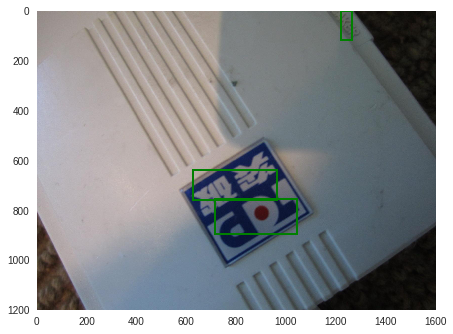

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_img(index):
  '''
  Función para mostrar una imagen con la posición de los textos
  que se encuentran en ella.
  '''
   
  x = []
  y = []
  w = []
  h = []
#   t = []
  
  fig,ax = plt.subplots(1)
  ax.imshow(train_X[index])
  
  if len(train_Y[index].shape) == 1:
    x = train_Y[index][2]
    y = train_Y[index][3]
    w = train_Y[index][4]
    h = train_Y[index][5]
#     t = train_Y[index][6]
    
    rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='g',facecolor='none')
    ax.add_patch(rect)
    
  else:
    n_rect = train_Y[index].shape[0]
    for i in range(n_rect):
      x.append(train_Y[index][i][2])
      y.append(train_Y[index][i][3])
      w.append(train_Y[index][i][4])
      h.append(train_Y[index][i][5])
#       t.append(train_Y[index][i][6])
  
    for p in [
      patches.Rectangle(
          (x[p], y[p]),
          w[p],
          h[p],
          linewidth=2,
          edgecolor='g',
          facecolor='none'
      ) for p in range(n_rect)
    ]:
      ax.add_patch(p)  
    
  ax.grid(b=False)
  plt.show()
  
show_img(0)